In [2]:
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [3]:
# Configuration
DATA_DIR = "results/mcts-data"


# Analysis Functions

In [6]:
def load_all_json_files(directory):
    """Load all JSON files from the specified directory."""
    data_files = []
    path = Path(directory)
    
    if not path.exists():
        print(f"Directory {directory} not found!")
        return data_files
    
    for file in path.glob("*.json"):
        try:
            with open(file, 'r') as f:
                data = json.load(f)
                data['filename'] = file.name
                data_files.append(data)
        except Exception as e:
            print(f"Error loading {file}: {e}")
    
    print(f"Loaded {len(data_files)} files")
    return data_files

def plot_win_rates(data_files):
    """Plot win rates across all games."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    filenames = [d['filename'] for d in data_files]
    black_wins = [d.get('summary', {}).get('black_win_rate', 0) for d in data_files]
    white_wins = [d.get('summary', {}).get('white_win_rate', 0) for d in data_files]
    draws = [d.get('summary', {}).get('draw_rate', 0) for d in data_files]
    
    x = np.arange(len(filenames))
    width = 0.25
    
    ax.bar(x - width, black_wins, width, label='Black Win Rate', color='black', alpha=0.7)
    ax.bar(x, white_wins, width, label='White Win Rate', color='white', edgecolor='black', alpha=0.7)
    ax.bar(x + width, draws, width, label='Draw Rate', color='gray', alpha=0.7)
    
    ax.set_xlabel('Game Files')
    ax.set_ylabel('Win Rate (%)')
    ax.set_title('Win Rates Across Different Games')
    ax.set_xticks(x)
    ax.set_xticklabels(filenames, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_score_comparison(data_files):
    """Plot average scores for black and white players."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    filenames = [d['filename'] for d in data_files]
    black_scores = [d.get('summary', {}).get('avg_black_score', 0) for d in data_files]
    white_scores = [d.get('summary', {}).get('avg_white_score', 0) for d in data_files]
    
    x = np.arange(len(filenames))
    width = 0.35
    
    ax.bar(x - width/2, black_scores, width, label='Black Avg Score', color='black', alpha=0.7)
    ax.bar(x + width/2, white_scores, width, label='White Avg Score', color='lightgray', edgecolor='black', alpha=0.7)
    
    ax.set_xlabel('Game Files')
    ax.set_ylabel('Average Score')
    ax.set_title('Average Scores: Black vs White')
    ax.set_xticks(x)
    ax.set_xticklabels(filenames, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_game_length(data_files):
    """Plot average game length (total moves)."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    filenames = [d['filename'] for d in data_files]
    avg_moves = [d.get('summary', {}).get('avg_total_moves', 0) for d in data_files]
    
    ax.bar(range(len(filenames)), avg_moves, color='steelblue', alpha=0.7)
    ax.set_xlabel('Game Files')
    ax.set_ylabel('Average Total Moves')
    ax.set_title('Average Game Length')
    ax.set_xticks(range(len(filenames)))
    ax.set_xticklabels(filenames, rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_memory_usage(data_files):
    """Plot memory usage statistics."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    filenames = [d['filename'] for d in data_files]
    avg_memory = [d.get('summary', {}).get('avg_memory_usage_mb', 0) for d in data_files]
    peak_memory = [d.get('summary', {}).get('peak_memory_usage_mb', 0) for d in data_files]
    
    # Average memory usage
    ax1.bar(range(len(filenames)), avg_memory, color='green', alpha=0.7)
    ax1.set_xlabel('Game Files')
    ax1.set_ylabel('Memory (MB)')
    ax1.set_title('Average Memory Usage')
    ax1.set_xticks(range(len(filenames)))
    ax1.set_xticklabels(filenames, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Peak memory usage
    ax2.bar(range(len(filenames)), peak_memory, color='red', alpha=0.7)
    ax2.set_xlabel('Game Files')
    ax2.set_ylabel('Memory (MB)')
    ax2.set_title('Peak Memory Usage')
    ax2.set_xticks(range(len(filenames)))
    ax2.set_xticklabels(filenames, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_time_per_game(data_files):
    """Plot average time per game."""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    filenames = [d['filename'] for d in data_files]
    avg_time = [d.get('summary', {}).get('avg_time_per_game', 0) for d in data_files]
    
    ax.bar(range(len(filenames)), avg_time, color='purple', alpha=0.7)
    ax.set_xlabel('Game Files')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Average Time Per Game')
    ax.set_xticks(range(len(filenames)))
    ax.set_xticklabels(filenames, rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_move_time_comparison(data_files):
    """Plot average move times for black and white players."""
    # Check if any file has move time data
    has_timing_data = any(d.get('summary', {}).get('avg_move_time_black') is not None 
                          for d in data_files)
    
    if not has_timing_data:
        print("No move timing data found in files")
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    filenames = [d['filename'] for d in data_files]
    black_avg = [d.get('summary', {}).get('avg_move_time_black', 0) for d in data_files]
    white_avg = [d.get('summary', {}).get('avg_move_time_white', 0) for d in data_files]
    black_max = [d.get('summary', {}).get('max_move_time_black', 0) for d in data_files]
    white_max = [d.get('summary', {}).get('max_move_time_white', 0) for d in data_files]
    
    x = np.arange(len(filenames))
    width = 0.35
    
    # Average move times
    ax1.bar(x - width/2, black_avg, width, label='Black Avg', color='black', alpha=0.7)
    ax1.bar(x + width/2, white_avg, width, label='White Avg', color='lightgray', edgecolor='black', alpha=0.7)
    ax1.set_xlabel('Game Files')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_title('Average Move Time per Player')
    ax1.set_xticks(x)
    ax1.set_xticklabels(filenames, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Max move times
    ax2.bar(x - width/2, black_max, width, label='Black Max', color='black', alpha=0.7)
    ax2.bar(x + width/2, white_max, width, label='White Max', color='lightgray', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Game Files')
    ax2.set_ylabel('Time (seconds)')
    ax2.set_title('Maximum Move Time per Player')
    ax2.set_xticks(x)
    ax2.set_xticklabels(filenames, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_timing_by_game_phase(data_files):
    """Plot timing statistics by game phase (early/mid/late game)."""
    # Check if any file has game phase timing data
    has_phase_data = any(d.get('summary', {}).get('timing_by_game_phase') is not None 
                         for d in data_files)
    
    if not has_phase_data:
        print("No game phase timing data found in files")
        return
    
    # Aggregate data across all files
    phases = ['early_game', 'mid_game', 'late_game']
    avg_times = []
    max_times = []
    min_times = []
    
    for phase in phases:
        phase_avg = []
        phase_max = []
        phase_min = []
        
        for data in data_files:
            phase_data = data.get('summary', {}).get('timing_by_game_phase', {}).get(phase, {})
            if phase_data:
                phase_avg.append(phase_data.get('avg_time', 0))
                phase_max.append(phase_data.get('max_time', 0))
                phase_min.append(phase_data.get('min_time', 0))
        
        avg_times.append(np.mean(phase_avg) if phase_avg else 0)
        max_times.append(np.mean(phase_max) if phase_max else 0)
        min_times.append(np.mean(phase_min) if phase_min else 0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    x = np.arange(len(phases))
    
    # Average times by phase
    ax1.bar(x, avg_times, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
    ax1.set_xlabel('Game Phase')
    ax1.set_ylabel('Average Time (seconds)')
    ax1.set_title('Average Move Time by Game Phase')
    ax1.set_xticks(x)
    ax1.set_xticklabels(['Early Game', 'Mid Game', 'Late Game'])
    ax1.grid(True, alpha=0.3)
    
    # Min/Max times by phase
    width = 0.35
    ax2.bar(x - width/2, max_times, width, label='Max Time', color='red', alpha=0.7)
    ax2.bar(x + width/2, min_times, width, label='Min Time', color='blue', alpha=0.7)
    ax2.set_xlabel('Game Phase')
    ax2.set_ylabel('Time (seconds)')
    ax2.set_title('Min/Max Move Times by Game Phase')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Early Game', 'Mid Game', 'Late Game'])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_timing_by_board_fill(data_files):
    """Plot timing statistics by board fill percentage."""
    # Check if any file has board fill timing data
    has_fill_data = any(d.get('summary', {}).get('timing_by_board_fill') is not None 
                        for d in data_files)
    
    if not has_fill_data:
        print("No board fill timing data found in files")
        return
    
    # Aggregate data across all files
    fill_stages = ['early', 'mid', 'late']
    avg_times = []
    max_times = []
    move_counts = []
    
    for stage in fill_stages:
        stage_avg = []
        stage_max = []
        stage_moves = []
        
        for data in data_files:
            fill_data = data.get('summary', {}).get('timing_by_board_fill', {}).get(stage, {})
            if fill_data:
                stage_avg.append(fill_data.get('avg_time', 0))
                stage_max.append(fill_data.get('max_time', 0))
                stage_moves.append(fill_data.get('move_count', 0))
        
        avg_times.append(np.mean(stage_avg) if stage_avg else 0)
        max_times.append(np.mean(stage_max) if stage_max else 0)
        move_counts.append(np.sum(stage_moves) if stage_moves else 0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    x = np.arange(len(fill_stages))
    
    # Average times by board fill
    ax1.bar(x, avg_times, color=['#d62728', '#9467bd', '#8c564b'], alpha=0.7)
    ax1.set_xlabel('Board Fill Stage')
    ax1.set_ylabel('Average Time (seconds)')
    ax1.set_title('Average Move Time by Board Fill Percentage')
    ax1.set_xticks(x)
    ax1.set_xticklabels(['Early (0-33%)', 'Mid (33-66%)', 'Late (66-100%)'])
    ax1.grid(True, alpha=0.3)
    
    # Move count distribution
    ax2.bar(x, move_counts, color=['#d62728', '#9467bd', '#8c564b'], alpha=0.7)
    ax2.set_xlabel('Board Fill Stage')
    ax2.set_ylabel('Total Move Count')
    ax2.set_title('Move Distribution by Board Fill Percentage')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Early (0-33%)', 'Mid (33-66%)', 'Late (66-100%)'])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_combined_timing_heatmap(data_files):
    """Create a heatmap showing timing patterns across all files."""
    has_phase_data = any(d.get('summary', {}).get('timing_by_game_phase') is not None 
                         for d in data_files)
    
    if not has_phase_data:
        print("No timing data for heatmap")
        return
    
    filenames = []
    phases = ['early_game', 'mid_game', 'late_game']
    timing_matrix = []
    
    for data in data_files:
        phase_timing = data.get('summary', {}).get('timing_by_game_phase', {})
        if phase_timing:
            filenames.append(data['filename'][:25])
            row = [phase_timing.get(phase, {}).get('avg_time', 0) for phase in phases]
            timing_matrix.append(row)
    
    if not timing_matrix:
        print("No timing data available for heatmap")
        return
    
    fig, ax = plt.subplots(figsize=(10, max(6, len(filenames) * 0.4)))
    
    im = ax.imshow(timing_matrix, cmap='YlOrRd', aspect='auto')
    
    ax.set_xticks(np.arange(len(phases)))
    ax.set_yticks(np.arange(len(filenames)))
    ax.set_xticklabels(['Early Game', 'Mid Game', 'Late Game'])
    ax.set_yticklabels(filenames)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Average Time (seconds)', rotation=270, labelpad=20)
    
    # Add text annotations
    for i in range(len(filenames)):
        for j in range(len(phases)):
            text = ax.text(j, i, f'{timing_matrix[i][j]:.3f}',
                          ha="center", va="center", color="black", fontsize=8)
    
    ax.set_title('Move Time Heatmap by Game Phase')
    plt.tight_layout()
    plt.show()

def plot_agent_comparison(data_files):
    """Group results by agent configuration and compare performance."""
    agent_stats = defaultdict(lambda: {'black_wins': [], 'white_wins': [], 'draws': []})
    
    for data in data_files:
        config = data.get('config', {})
        agents = config.get('agents', [])
        agent_key = str(agents)
        
        agent_stats[agent_key]['black_wins'].append(data.get('black_wins', 0))
        agent_stats[agent_key]['white_wins'].append(data.get('white_wins', 0))
        agent_stats[agent_key]['draws'].append(data.get('draws', 0))
    
    if not agent_stats:
        print("No agent configuration data found")
        return
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    agent_names = list(agent_stats.keys())
    black_totals = [sum(agent_stats[name]['black_wins']) for name in agent_names]
    white_totals = [sum(agent_stats[name]['white_wins']) for name in agent_names]
    draw_totals = [sum(agent_stats[name]['draws']) for name in agent_names]
    
    x = np.arange(len(agent_names))
    width = 0.25
    
    ax.bar(x - width, black_totals, width, label='Black Wins', color='black', alpha=0.7)
    ax.bar(x, white_totals, width, label='White Wins', color='white', edgecolor='black', alpha=0.7)
    ax.bar(x + width, draw_totals, width, label='Draws', color='gray', alpha=0.7)
    
    ax.set_xlabel('Agent Configuration')
    ax.set_ylabel('Total Wins')
    ax.set_title('Performance by Agent Configuration')
    ax.set_xticks(x)
    ax.set_xticklabels([f"Config {i+1}" for i in range(len(agent_names))], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_summary_table(data_files):
    """Create a summary table of all data."""
    print("\n" + "="*120)
    print("SUMMARY TABLE")
    print("="*120)
    print(f"{'Filename':<30} {'Games':<8} {'Black%':<8} {'White%':<8} {'Draws%':<8} {'Avg Moves':<10} {'Avg Time':<10} {'B Move':<10} {'W Move':<10}")
    print("-"*120)
    
    for data in data_files:
        filename = data['filename'][:28]
        num_games = data.get('num_games', 0)
        summary = data.get('summary', {})
        black_wr = summary.get('black_win_rate', 0)
        white_wr = summary.get('white_win_rate', 0)
        draw_rate = summary.get('draw_rate', 0)
        avg_moves = summary.get('avg_total_moves', 0)
        avg_time = summary.get('avg_time_per_game', 0)
        black_move_time = summary.get('avg_move_time_black', 0)
        white_move_time = summary.get('avg_move_time_white', 0)
        
        print(f"{filename:<30} {num_games:<8} {black_wr:<8.1f} {white_wr:<8.1f} {draw_rate:<8.1f} "
              f"{avg_moves:<10.1f} {avg_time:<10.2f} {black_move_time:<10.3f} {white_move_time:<10.3f}")
    
    print("="*120)

# The Fun Stuff

Loading data from: results/mcts-data
Loaded 6 files

SUMMARY TABLE
Filename                       Games    Black%   White%   Draws%   Avg Moves  Avg Time   B Move     W Move    
------------------------------------------------------------------------------------------------------------------------
mcts-100-r-1-vs-minimax.json   100      15.0     85.0     0.0      30.0       28.53      0.761      0.194     
mcts-100-r-10-vs-minimax-alt   100      37.0     63.0     0.0      30.0       213.65     6.949      0.195     
mcts-100-r-5-vs-minimax.json   100      20.0     79.0     1.0      30.0       110.64     3.508      0.197     
minimax-vs-mcts-100-r-5.json   100      75.0     25.0     0.0      30.0       103.96     0.182      3.347     
mcts-100-r-10-vs-minimax.jso   100      28.0     72.0     0.0      30.0       213.49     6.954      0.189     
minimax-vs-mcts-100-r-1.json   100      79.0     18.0     3.0      30.0       27.29      0.192      0.727     


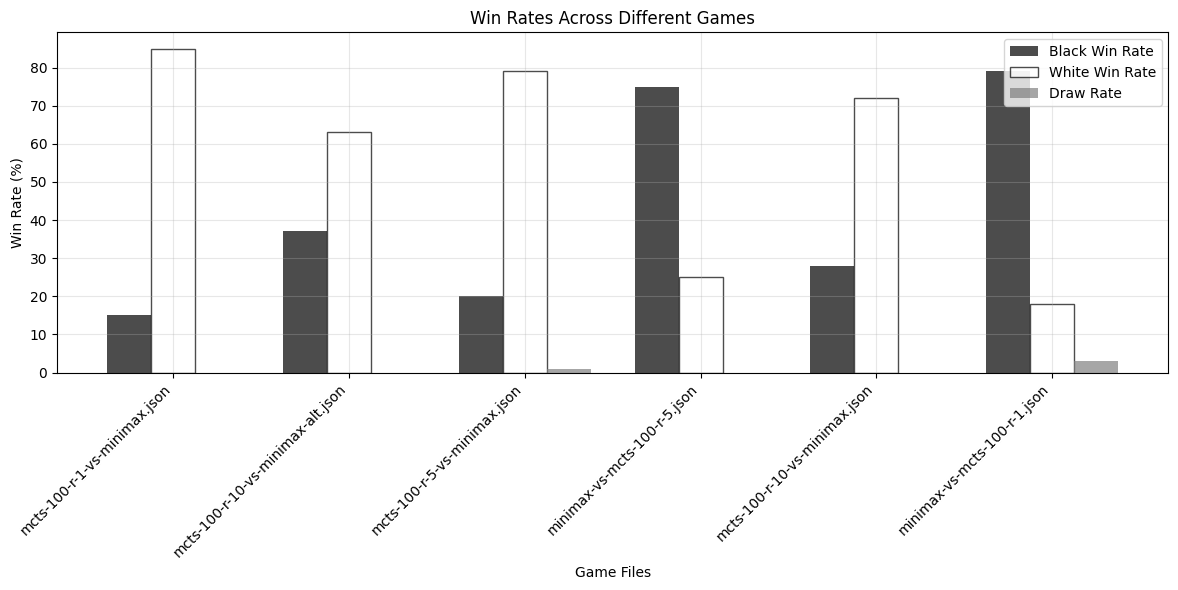

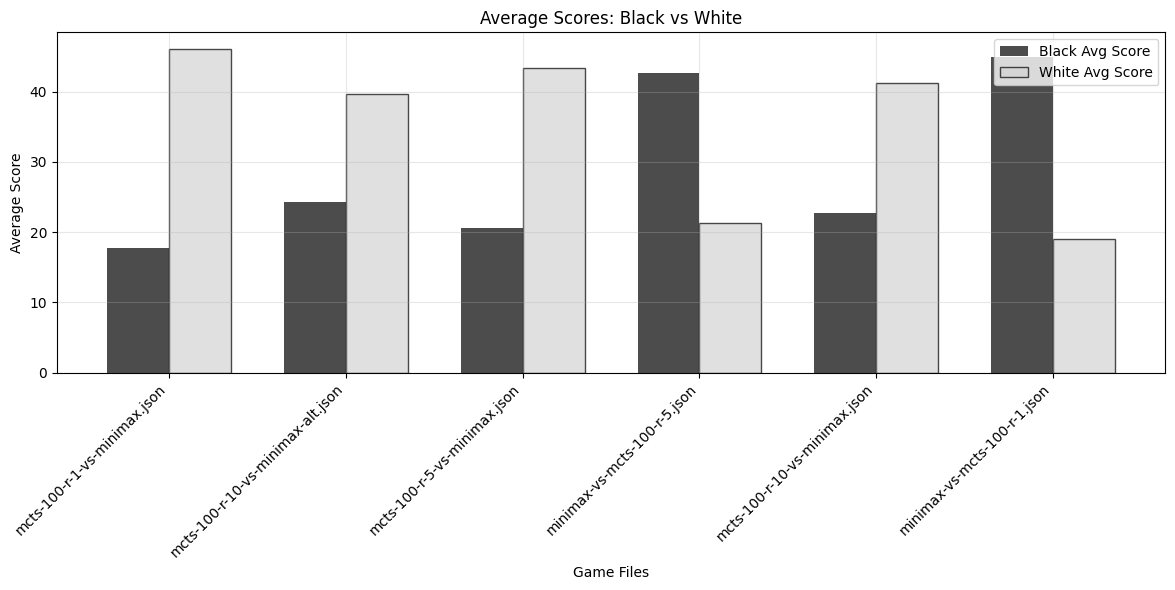

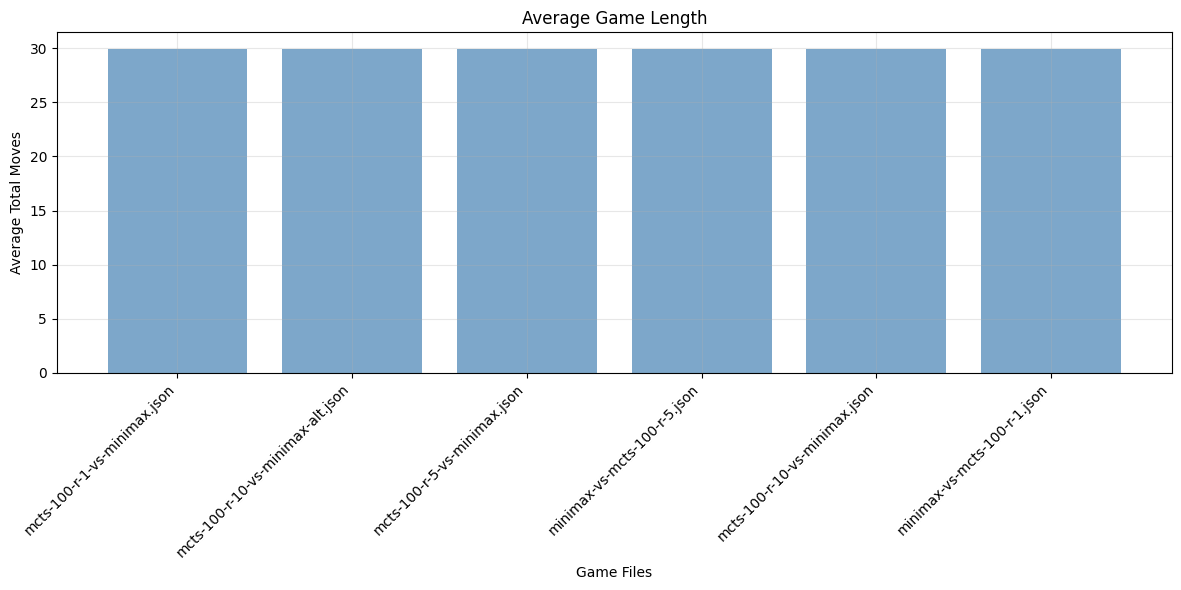

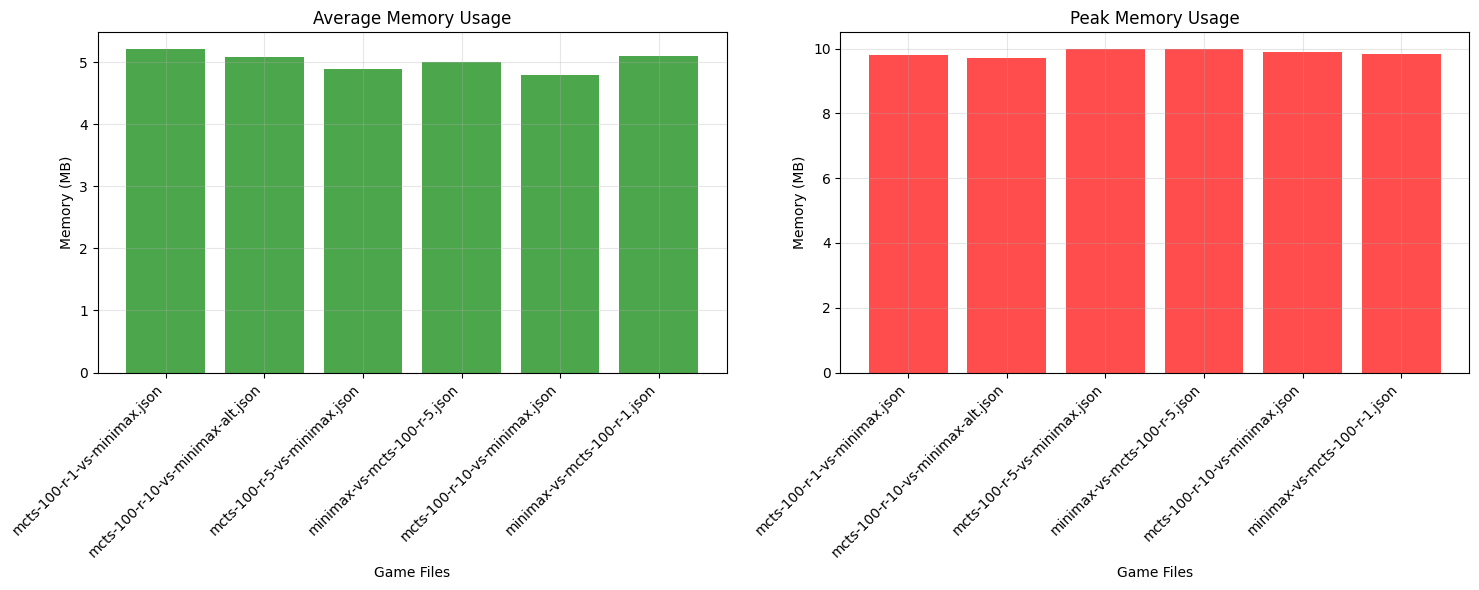

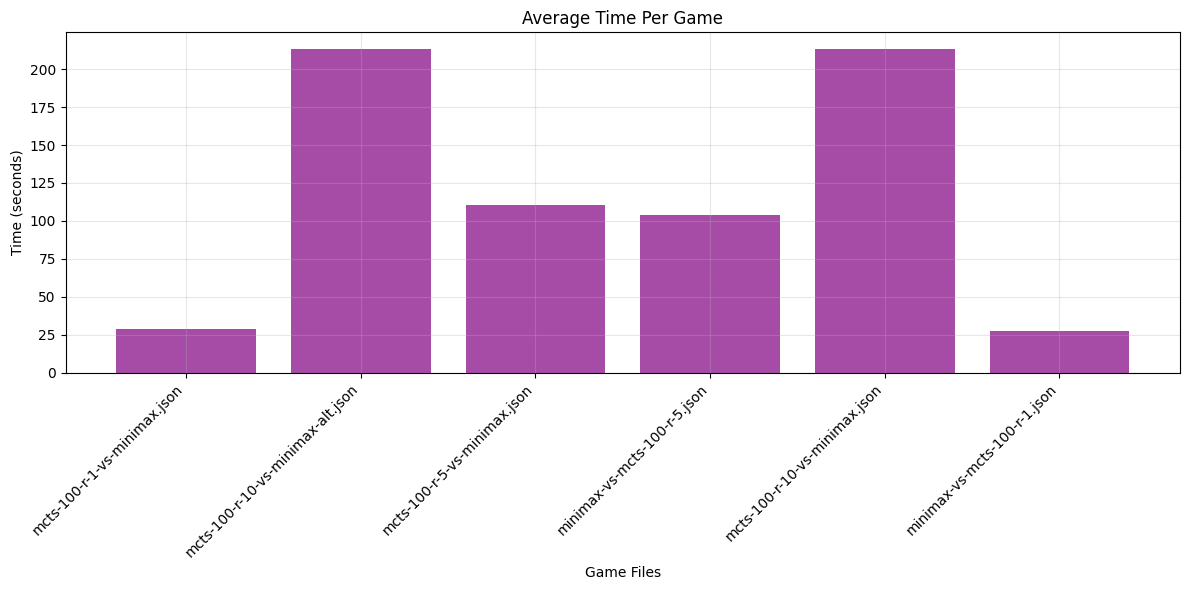

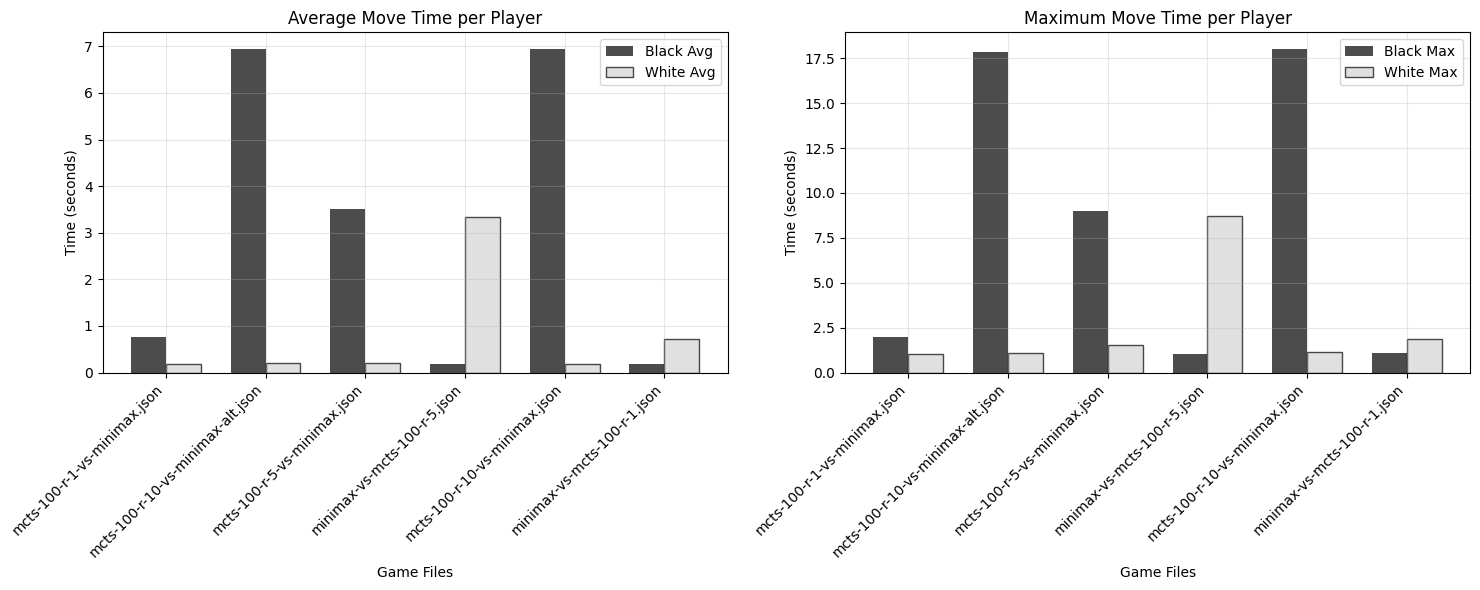

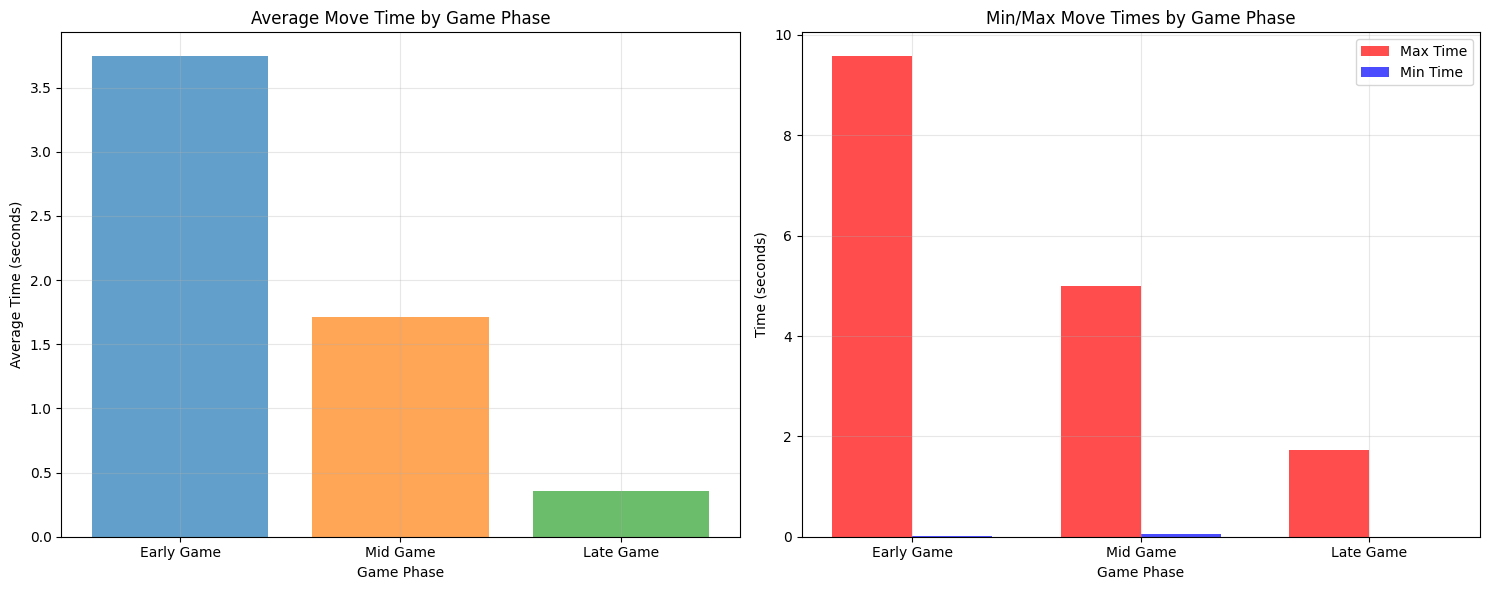

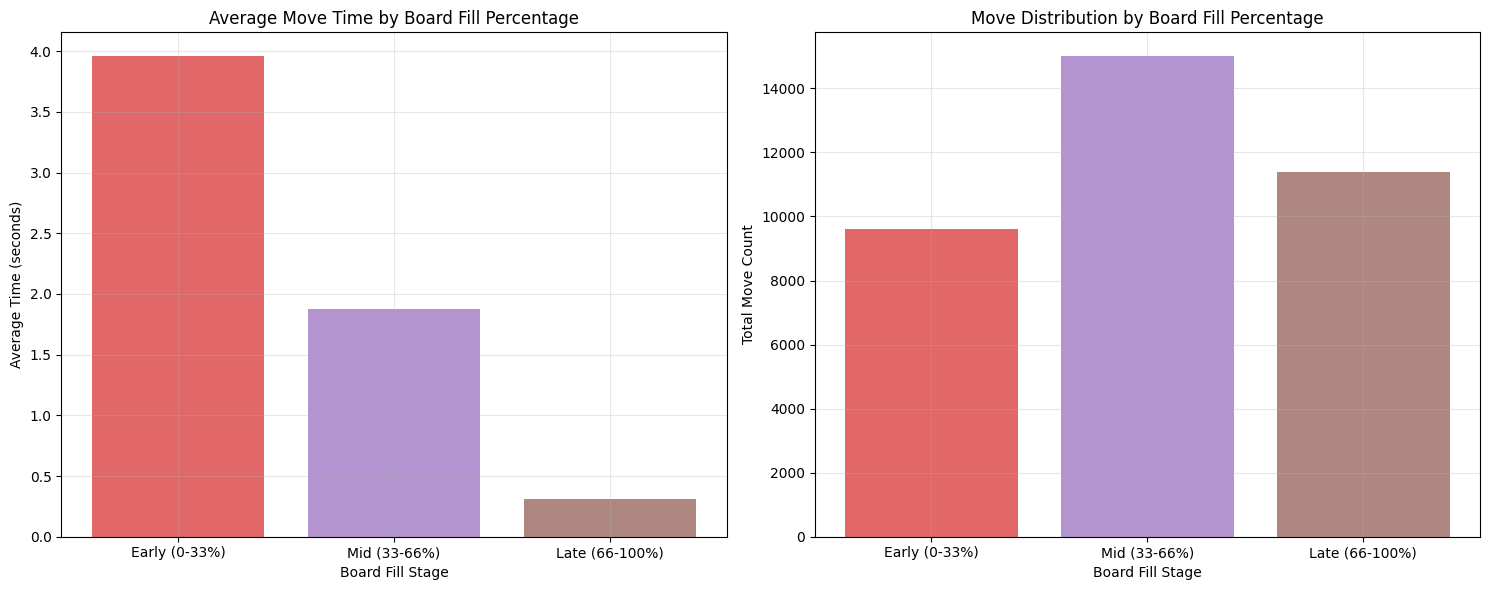

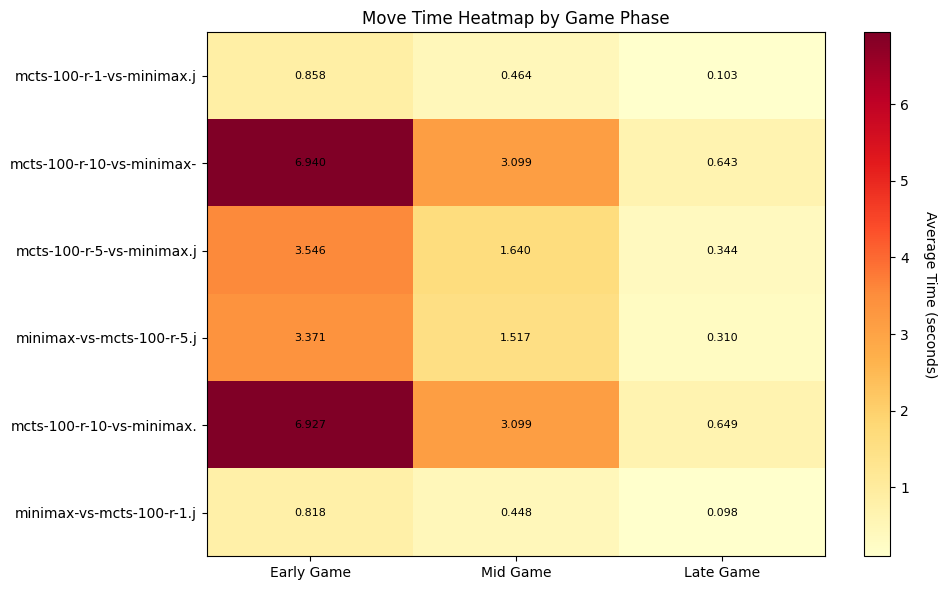

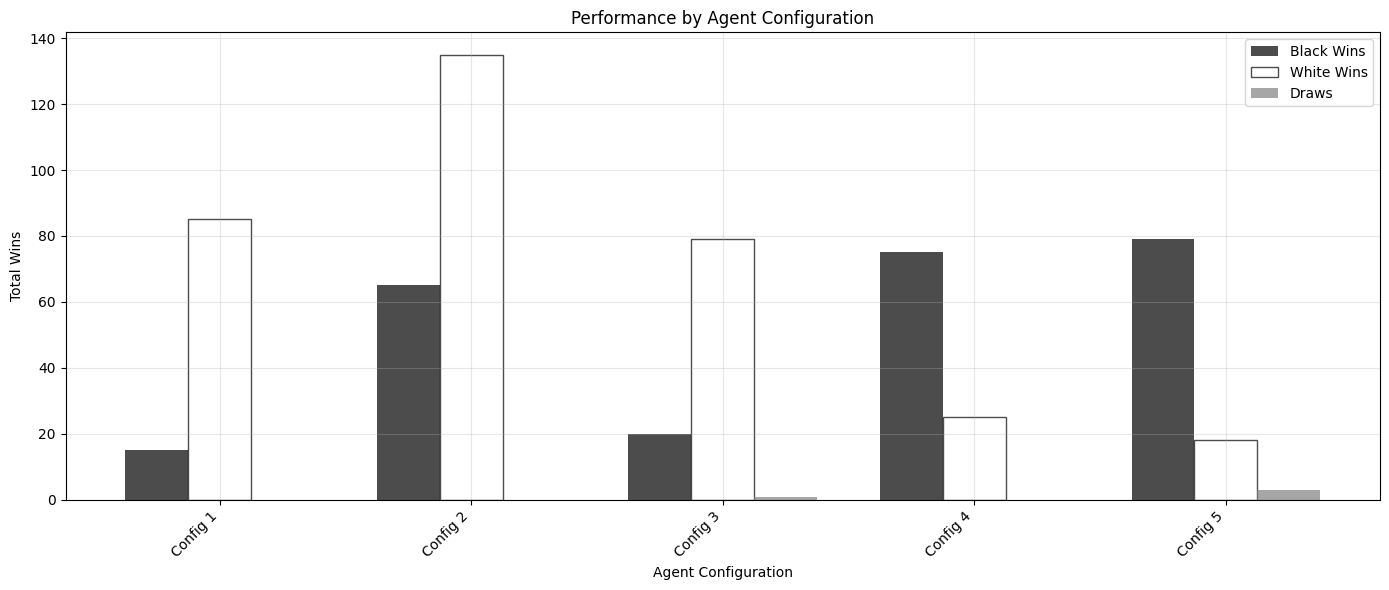

In [7]:
print("Loading data from:", DATA_DIR)
data_files = load_all_json_files(DATA_DIR)

if data_files:
    # Create all visualizations
    create_summary_table(data_files)
    plot_win_rates(data_files)
    plot_score_comparison(data_files)
    plot_game_length(data_files)
    plot_memory_usage(data_files)
    plot_time_per_game(data_files)
    plot_move_time_comparison(data_files)
    plot_timing_by_game_phase(data_files)
    plot_timing_by_board_fill(data_files)
    plot_combined_timing_heatmap(data_files)
    plot_agent_comparison(data_files)
else:
    print("No data files found. Please check the directory path.")